# Explanatory Data Analysis

## Questions to be answered

1. What is the relation between gender, age and occupation with crime committing? Has it changed over the years?
2. Is there a relation between the type of crimes committed and its victims?
3. Has the number of crimes increased or decreased over the century? If positive, by how much?
4. What are the most common crimes committed? And most common punishments? Have they changed over the years?
5. How do seasonal or monthly trends affect the data?

## Processing dataset

In [1]:
import pandas as pd
import lxml
from lxml import etree
import os
import json
import wget
import unzip
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Use this cell to import data directly from JSON file
trials_data = []

# Gets JSON file
with open("extracted_data.json") as json_file:
    trials_data = json.load(json_file)

In [3]:
df = pd.DataFrame(trials_data)

In [4]:
df

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
0,t16740429-1,16740429,[male],[],[],[male],[guilty],[],[violentTheft],[highwayRobbery],[],[]
1,t16740429-2,16740429,[male],[],[],[male],[guilty],[],[theft],[grandLarceny],[death],[]
2,t16740429-3,16740429,"[male, male, male]",[],[],[male],[guilty],[],[theft],[burglary],[],[]
3,t16740429-4,16740429,[male],[],[],[female],[notGuilty],[],[sexual],[rape],[],[]
4,t16740429-5,16740429,[female],[],[],[female],[guilty],[],[theft],[other],[transport],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,19130401,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,19130401,[male],[24],[labourer],[],[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,19130401,"[male, male]","[24, 18]",[],[male],[notGuilty],[noEvidence],[kill],[manslaughter],[],[]
197749,t19130401-66,19130401,[male],[17],[labourer],[],[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]


In [5]:
# Cleaning irrelevant values
# The mask function replaces (lists that are False) and (elements of value [''] or ['indeterminate']) with NaN
df_wnan = df.mask((df.map(type).eq(list) & ~df.astype(bool)) |
                  (df.map(lambda x: (x == [''] or x == ['indeterminate']))),
                  other=np.nan)

In [6]:
df_wnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197751 entries, 0 to 197750
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   trial_id                      197751 non-null  object
 1   trial_date                    197751 non-null  object
 2   trial_defendant_gender        197627 non-null  object
 3   trial_defendant_age           119297 non-null  object
 4   trial_defendant_occupation    7013 non-null    object
 5   trial_victim_gender           165658 non-null  object
 6   trial_verdict_category        197445 non-null  object
 7   trial_verdict_subcategory     107907 non-null  object
 8   trial_offence_category        197695 non-null  object
 9   trial_offence_subcategory     197695 non-null  object
 10  trial_punishment_category     146132 non-null  object
 11  trial_punishment_subcategory  89033 non-null   object
dtypes: object(12)
memory usage: 18.1+ MB


In [7]:
df_wnan

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
0,t16740429-1,16740429,[male],NaN,NaN,[male],[guilty],NaN,[violentTheft],[highwayRobbery],NaN,NaN
1,t16740429-2,16740429,[male],NaN,NaN,[male],[guilty],NaN,[theft],[grandLarceny],[death],NaN
2,t16740429-3,16740429,"[male, male, male]",NaN,NaN,[male],[guilty],NaN,[theft],[burglary],NaN,NaN
3,t16740429-4,16740429,[male],NaN,NaN,[female],[notGuilty],NaN,[sexual],[rape],NaN,NaN
4,t16740429-5,16740429,[female],NaN,NaN,[female],[guilty],NaN,[theft],[other],[transport],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,19130401,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,19130401,[male],[24],[labourer],NaN,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,19130401,"[male, male]","[24, 18]",NaN,[male],[notGuilty],[noEvidence],[kill],[manslaughter],NaN,NaN
197749,t19130401-66,19130401,[male],[17],[labourer],NaN,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]


In [8]:
# find out null percentage of data

In [9]:
print(df_wnan['trial_date'])
print(type(df_wnan.trial_date[0]))

0         16740429
1         16740429
2         16740429
3         16740429
4         16740429
            ...   
197746    19130401
197747    19130401
197748    19130401
197749    19130401
197750    19130401
Name: trial_date, Length: 197751, dtype: object
<class 'str'>


In [10]:
# talk about old bailey records timeline

In [11]:
# Transforming to datetime type
# Timestamps that marked before 1677 were replaced as NaT
df_wnan['trial_date'] = pd.to_datetime(df_wnan['trial_date'], format='%Y%m%d', errors="coerce")

df_wnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197751 entries, 0 to 197750
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trial_id                      197751 non-null  object        
 1   trial_date                    197522 non-null  datetime64[ns]
 2   trial_defendant_gender        197627 non-null  object        
 3   trial_defendant_age           119297 non-null  object        
 4   trial_defendant_occupation    7013 non-null    object        
 5   trial_victim_gender           165658 non-null  object        
 6   trial_verdict_category        197445 non-null  object        
 7   trial_verdict_subcategory     107907 non-null  object        
 8   trial_offence_category        197695 non-null  object        
 9   trial_offence_subcategory     197695 non-null  object        
 10  trial_punishment_category     146132 non-null  object        
 11  trial_punishm

In [12]:
print(df_wnan['trial_date'])

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
197746   1913-04-01
197747   1913-04-01
197748   1913-04-01
197749   1913-04-01
197750   1913-04-01
Name: trial_date, Length: 197751, dtype: datetime64[ns]


## Has the number of crimes increased or decreased over the century? If positive, by how much?

In [13]:
df_wnan.tail(5)

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],NaN,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",NaN,[male],[notGuilty],[noEvidence],[kill],[manslaughter],NaN,NaN
197749,t19130401-66,1913-04-01,[male],[17],[labourer],NaN,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]
197750,t19130401-67,1913-04-01,[female],[53],NaN,NaN,[guilty],[withRecommendation],[damage],[other],[imprison],[penalServitude]


In [14]:
df_wnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197751 entries, 0 to 197750
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trial_id                      197751 non-null  object        
 1   trial_date                    197522 non-null  datetime64[ns]
 2   trial_defendant_gender        197627 non-null  object        
 3   trial_defendant_age           119297 non-null  object        
 4   trial_defendant_occupation    7013 non-null    object        
 5   trial_victim_gender           165658 non-null  object        
 6   trial_verdict_category        197445 non-null  object        
 7   trial_verdict_subcategory     107907 non-null  object        
 8   trial_offence_category        197695 non-null  object        
 9   trial_offence_subcategory     197695 non-null  object        
 10  trial_punishment_category     146132 non-null  object        
 11  trial_punishm

In [15]:
df_wnan_timestamp = df_wnan.copy()

In [16]:
# Extracting day, month and year values from date (float) and converting to int
# Creating new columns for each
df_wnan_timestamp['trial_month'] = df_wnan_timestamp['trial_date'].dt.month.convert_dtypes(convert_integer=True)

df_wnan_timestamp['trial_year'] = df_wnan_timestamp['trial_date'].dt.year.convert_dtypes(convert_integer=True)

df_wnan_timestamp['trial_day'] = df_wnan_timestamp['trial_date'].dt.day.convert_dtypes(convert_integer=True)

In [17]:
# Number of trials per month
df_wnan_timestamp['trial_month'].value_counts().sort_values(ascending=True)

trial_month
3      5811
8      9099
11     9775
6     14123
7     14834
12    17690
5     17996
1     19416
2     20381
10    20447
4     22642
9     25308
Name: count, dtype: Int64

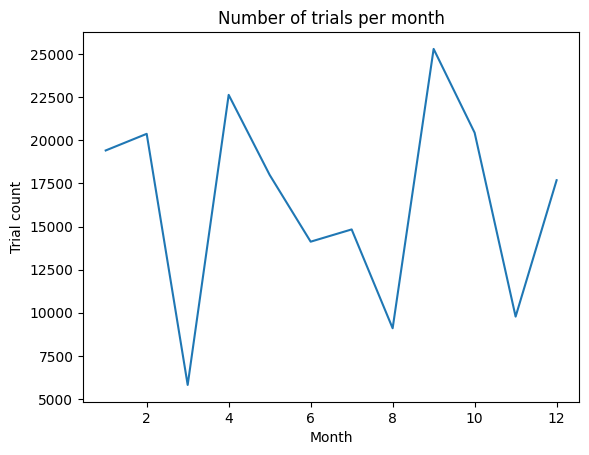

In [18]:
value_counts_month = df_wnan_timestamp['trial_month'].value_counts().sort_index()
plt.plot(value_counts_month.index, value_counts_month.values)
plt.xlabel('Month')
plt.ylabel('Trial count')
plt.title('Number of trials per month')
plt.show()

In [19]:
# Number of trials per year
df_wnan_timestamp['trial_year'].value_counts().sort_values(ascending=True)

trial_year
1706       1
1677      25
1702      69
1703      72
1709      99
        ... 
1838    2718
1841    2791
1839    2822
1842    3090
1843    3100
Name: count, Length: 235, dtype: Int64

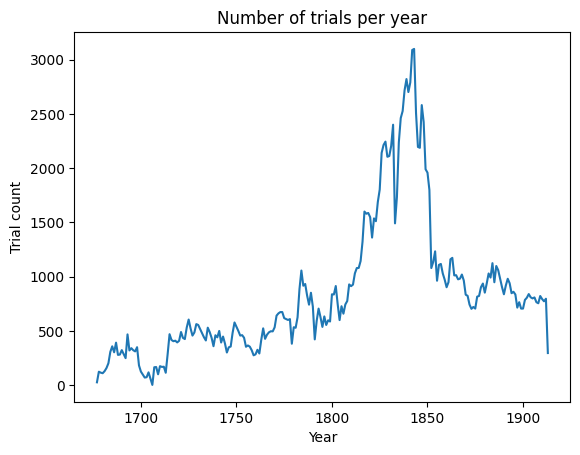

In [20]:
value_counts_year = df_wnan_timestamp['trial_year'].value_counts().sort_index()
plt.plot(value_counts_year.index, value_counts_year.values)
plt.xlabel('Year')
plt.ylabel('Trial count')
plt.title('Number of trials per year')
plt.show()

In [21]:
# Number of trials per day number
df_wnan_timestamp['trial_day'].value_counts().sort_values(ascending=True)

trial_day
31    2393
29    4305
30    4340
1     4413
24    4507
22    5011
19    5379
26    5502
25    5507
21    5530
27    5570
20    5577
2     5640
23    5708
18    6577
13    6628
4     6687
28    6707
5     6716
7     6719
9     6749
3     7457
8     7628
12    7720
17    7793
6     7815
10    8065
11    8486
14    8567
16    8776
15    9050
Name: count, dtype: Int64

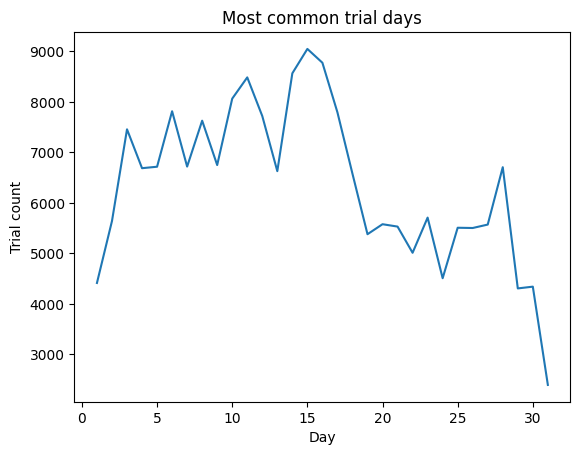

In [22]:
value_counts_days = df_wnan_timestamp['trial_day'].value_counts().sort_index()
plt.plot(value_counts_days.index, value_counts_days.values)
plt.xlabel('Day')
plt.ylabel('Trial count')
plt.title('Most common trial days')
plt.show()


## What are the most common crimes committed? And most common punishments? Have they changed over the years?

In [23]:
df_wnan.tail(10)

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
197741,t19130401-58,1913-04-01,[male],[36],[surveyor],"[male, male, male, male, male]",[guilty],[pleadedGuilty],[deception],[fraud],[imprison],[hardLabour]
197742,t19130401-59,1913-04-01,[male],[26],[telegraphist],NaN,[notGuilty],NaN,[deception],[forgery],NaN,NaN
197743,t19130401-60,1913-04-01,"[male, male, male]","[20, 25, 23]","[artist, no occupation]","[female, female, female, female, female]","[guilty, guilty, guilty]","[pleadedGuilty, pleadedPartGuilty, no_subcateg...","[theft, theft, theft]","[theftFromPlace, theftFromPlace, theftFromPlace]","[imprison, imprison]","[hardLabour, penalServitude]"
197744,t19130401-61,1913-04-01,[male],[43],[fireman],NaN,[guilty],[pleadedGuilty],[theft],[theftFromPlace],[imprison],[penalServitude]
197745,t19130401-62,1913-04-01,[male],[45],[labourer],[male],[guilty],[pleadedGuilty],[theft],[simpleLarceny],[imprison],[hardLabour]
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],NaN,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",NaN,[male],[notGuilty],[noEvidence],[kill],[manslaughter],NaN,NaN
197749,t19130401-66,1913-04-01,[male],[17],[labourer],NaN,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]
197750,t19130401-67,1913-04-01,[female],[53],NaN,NaN,[guilty],[withRecommendation],[damage],[other],[imprison],[penalServitude]


In [24]:
df_wnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197751 entries, 0 to 197750
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trial_id                      197751 non-null  object        
 1   trial_date                    197522 non-null  datetime64[ns]
 2   trial_defendant_gender        197627 non-null  object        
 3   trial_defendant_age           119297 non-null  object        
 4   trial_defendant_occupation    7013 non-null    object        
 5   trial_victim_gender           165658 non-null  object        
 6   trial_verdict_category        197445 non-null  object        
 7   trial_verdict_subcategory     107907 non-null  object        
 8   trial_offence_category        197695 non-null  object        
 9   trial_offence_subcategory     197695 non-null  object        
 10  trial_punishment_category     146132 non-null  object        
 11  trial_punishm

In [25]:
df_wnan[['trial_offence_category', 'trial_offence_subcategory']]

,trial_offence_category,trial_offence_subcategory
0,[violentTheft],[highwayRobbery]
1,[theft],[grandLarceny]
2,[theft],[burglary]
3,[sexual],[rape]
4,[theft],[other]
...,...,...
197746,[breakingPeace],[wounding]
197747,[sexual],[rape]
197748,[kill],[manslaughter]
197749,[sexual],[sodomy]


In [26]:
# Exploding list values on dataframe
df_offences = df_wnan.explode(['trial_offence_category', 'trial_offence_subcategory'])
df_offences

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
0,t16740429-1,NaT,[male],NaN,NaN,[male],[guilty],NaN,violentTheft,highwayRobbery,NaN,NaN
1,t16740429-2,NaT,[male],NaN,NaN,[male],[guilty],NaN,theft,grandLarceny,[death],NaN
2,t16740429-3,NaT,"[male, male, male]",NaN,NaN,[male],[guilty],NaN,theft,burglary,NaN,NaN
3,t16740429-4,NaT,[male],NaN,NaN,[female],[notGuilty],NaN,sexual,rape,NaN,NaN
4,t16740429-5,NaT,[female],NaN,NaN,[female],[guilty],NaN,theft,other,[transport],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],breakingPeace,wounding,[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],NaN,[guilty],[no_subcategory],sexual,rape,[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",NaN,[male],[notGuilty],[noEvidence],kill,manslaughter,NaN,NaN
197749,t19130401-66,1913-04-01,[male],[17],[labourer],NaN,[guilty],[no_subcategory],sexual,sodomy,[imprison],[otherInstitution]


In [27]:
# Counting of offences by category and subcategory
df_offences[['trial_offence_category', 'trial_offence_subcategory']].value_counts()

trial_offence_category  trial_offence_subcategory
theft                   grandLarceny                 41257
                        simpleLarceny                30653
                        theftFromPlace               15342
                        pocketpicking                13655
                        stealingFromMaster           10934
                                                     ...  
royalOffences           seducingAllegiance              21
miscellaneous           piracy                           7
breakingPeace           vagabond                         4
                        barratry                         2
violentTheft            other                            1
Name: count, Length: 64, dtype: int64

In [28]:
# Storing just offence category count
offences_count = df_offences['trial_offence_category'].value_counts()
offences_count

trial_offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
Name: count, dtype: int64

In [29]:
offences_count_total = np.array(offences_count.values)
offences_count_total = sum(offences_count)
offences_count_total

theft_pct = (offences_count['theft'] / offences_count_total) * 100
print(f'Theft represents {theft_pct:.1f}% of all offences.')

Theft represents 71.5% of all offences.


In [30]:
# Taking theft out of the count since it is an outliar
not_theft_count = offences_count.iloc[1:9]
not_theft_sum = np.array(not_theft_count.values)
not_theft_sum = sum(not_theft_count)

offences_count['not_theft'] = not_theft_sum
offences_count

trial_offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
not_theft         60121
Name: count, dtype: int64

In [31]:
offences_to_plot = offences_count.loc[['theft', 'not_theft']]
offences_to_plot

trial_offence_category
theft        150993
not_theft     60121
Name: count, dtype: int64

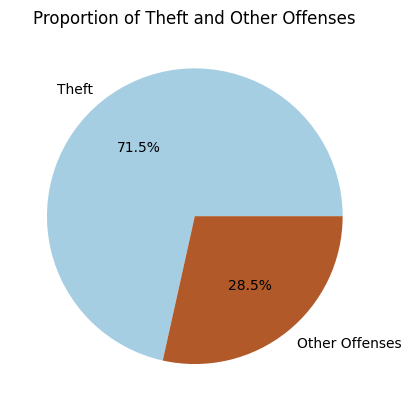

In [32]:
offences_to_plot.plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Paired',
                      labels=['Theft', 'Other Offenses',],
                      ylabel='',
                      )
plt.title("Proportion of Theft and Other Offenses", loc='center')
plt.show()

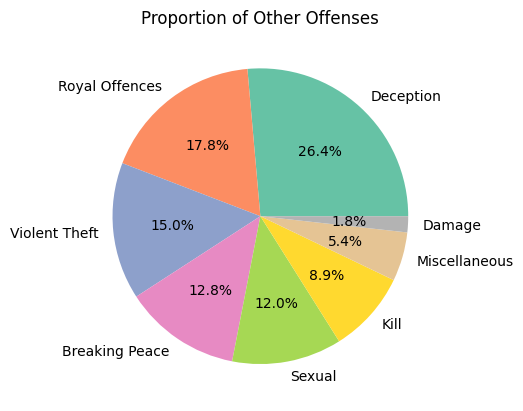

In [33]:
not_theft_count.plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Set2',
                      labels=['Deception', 'Royal Offences', 'Violent Theft', 'Breaking Peace', 'Sexual', 'Kill', 'Miscellaneous', 'Damage'],
                      ylabel='',

                      )
plt.title("Proportion of Other Offenses", loc='center')
plt.show()

In [34]:
# Storing offence category and subcategory
sub_count = df_offences[['trial_offence_category', 'trial_offence_subcategory']].value_counts()
sub_count

trial_offence_category  trial_offence_subcategory
theft                   grandLarceny                 41257
                        simpleLarceny                30653
                        theftFromPlace               15342
                        pocketpicking                13655
                        stealingFromMaster           10934
                                                     ...  
royalOffences           seducingAllegiance              21
miscellaneous           piracy                           7
breakingPeace           vagabond                         4
                        barratry                         2
violentTheft            other                            1
Name: count, Length: 64, dtype: int64

In [35]:
# Getting offence category list
sub_count_idx = sub_count.index.get_level_values('trial_offence_category').unique()
sub_count_idx

Index(['theft', 'royalOffences', 'deception', 'breakingPeace', 'violentTheft',
       'kill', 'sexual', 'miscellaneous', 'damage'],
      dtype='object', name='trial_offence_category')

In [36]:
# Storing subcategories of each offence
kill_sub = sub_count.loc['kill'].head(3)
sexual_sub = sub_count.loc['sexual'].head(4)
breaking_sub = sub_count.loc['breakingPeace'].head(3)
deception_sub = sub_count.loc['deception'].head(3)

In [37]:
kill_sub = kill_sub.rename({'infanticide': 'Infanticide', 'manslaughter': 'Manslaugher', 'murder': 'Murder'})
sexual_sub = sexual_sub.rename({'bigamy': 'Bigamy', 'rape': 'Rape', 'sodomy': 'sodomy', 'assaultWithIntent': 'Assault with intent'})
breaking_sub = breaking_sub.rename({'wounding': 'Wounding', 'assault': 'Assault', 'libel': 'Libel'})
deception_sub = deception_sub.rename({'forgery': 'Forgery', 'fraud': 'Fraud', 'perjury': 'Perjury'})

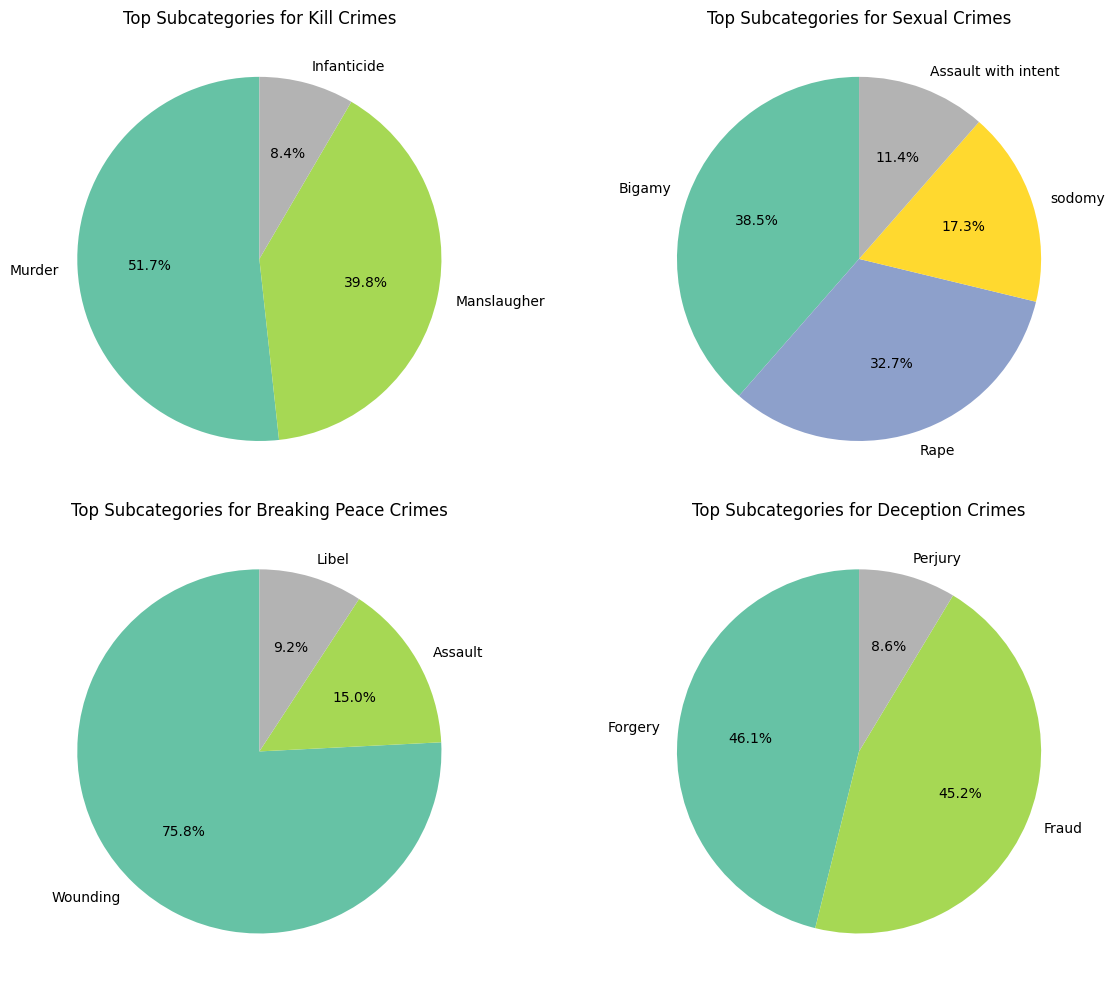

In [38]:
crime_subcategories = {
    "Kill": kill_sub,
    "Sexual": sexual_sub,
    "Breaking Peace": breaking_sub,
    "Deception": deception_sub
}

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier iteration

# Iterate through crime categories and plot pie charts
for i, (category, data) in enumerate(crime_subcategories.items()):
    data.plot(kind='pie',
              ax=axes[i],
              autopct='%1.1f%%',
              startangle=90,
              labels=data.index,
              colormap='Set2',
              ylabel='')
    axes[i].set_title(f"Top Subcategories for {category} Crimes")

plt.tight_layout()
plt.show()

In [39]:
df_punishment = df_wnan.explode('trial_punishment_category')
plot_punishment = df_punishment['trial_punishment_category'].value_counts().head(5)
plot_punishment.rename({'imprison': 'Imprison', 'transport': 'Transport', 'miscPunish': 'Miscellaneous', 'death': 'Death', 'corporal': 'Corporal'}, inplace=True)
plot_punishment

trial_punishment_category
Imprison         88182
Transport        41166
Miscellaneous    12905
Death            11597
Corporal          9017
Name: count, dtype: int64

In [40]:
# To plot punishment per offence, there would be need to explode the offence category as well as punishment category, but both are not the same size
# Can be implemented on the future

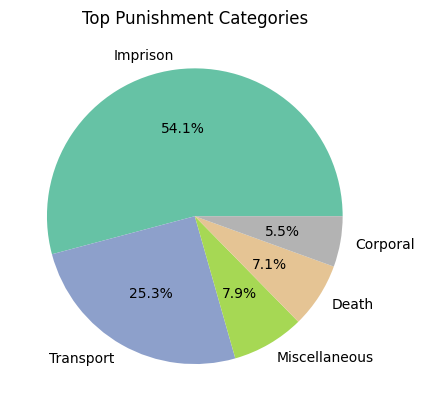

In [41]:
plot_punishment.plot(
    kind='pie',
    autopct='%1.1f%%',
    colormap='Set2',
    labels=plot_punishment.index,
    ylabel='',
)
plt.title('Top Punishment Categories', loc='center')
plt.show()

In [42]:
df_wnan

,trial_id,trial_date,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_victim_gender,trial_verdict_category,trial_verdict_subcategory,trial_offence_category,trial_offence_subcategory,trial_punishment_category,trial_punishment_subcategory
0,t16740429-1,NaT,[male],NaN,NaN,[male],[guilty],NaN,[violentTheft],[highwayRobbery],NaN,NaN
1,t16740429-2,NaT,[male],NaN,NaN,[male],[guilty],NaN,[theft],[grandLarceny],[death],NaN
2,t16740429-3,NaT,"[male, male, male]",NaN,NaN,[male],[guilty],NaN,[theft],[burglary],NaN,NaN
3,t16740429-4,NaT,[male],NaN,NaN,[female],[notGuilty],NaN,[sexual],[rape],NaN,NaN
4,t16740429-5,NaT,[female],NaN,NaN,[female],[guilty],NaN,[theft],[other],[transport],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],NaN,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",NaN,[male],[notGuilty],[noEvidence],[kill],[manslaughter],NaN,NaN
197749,t19130401-66,1913-04-01,[male],[17],[labourer],NaN,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]


In [43]:
df_offences['trial_offence_category'].value_counts()

trial_offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
Name: count, dtype: int64

In [44]:
df_wnan_timestamp[['trial_offence_category', 'trial_year']][df_wnan_timestamp.trial_year != np.nan]

,trial_offence_category,trial_year
229,[kill],1677
230,[theft],1677
231,"[theft, violentTheft, violentTheft, violentTheft]",1677
232,[royalOffences],1677
233,[royalOffences],1677
...,...,...
197746,[breakingPeace],1913
197747,[sexual],1913
197748,[kill],1913
197749,[sexual],1913


In [45]:
df_time_offence = df_wnan_timestamp[df_wnan_timestamp.trial_year != np.nan]
df_time_offence = df_time_offence.explode(['trial_offence_category', 'trial_offence_subcategory'])
df_time_offence_plot = df_time_offence[['trial_offence_category', 'trial_year']]


In [46]:
time_offence_count = df_time_offence_plot.value_counts()
time_offence_count

trial_offence_category  trial_year
theft                   1842          2835
                        1843          2763
                        1839          2555
                        1841          2540
                        1840          2428
                                      ... 
damage                  1735             1
                        1734             1
                        1732             1
                        1726             1
breakingPeace           1678             1
Name: count, Length: 1956, dtype: int64

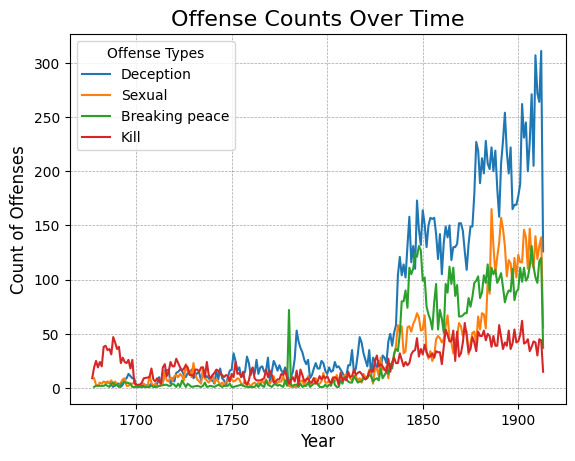

In [47]:
#time_offence_count['theft'].sort_index().plot(kind='line')
time_offence_count['deception'].sort_index().plot(
                    kind='line',
                    label='Deception',)

time_offence_count['sexual'].sort_index().plot(
                    kind='line',
                    label='Sexual')

time_offence_count['breakingPeace'].sort_index().plot(
                    kind='line', 
                    label='Breaking peace')

time_offence_count['kill'].sort_index().plot(
                    kind='line',
                    label='Kill')

plt.legend(title='Offense Types')

plt.title('Offense Counts Over Time', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Offenses', fontsize=12)

plt.show()

In [48]:
df_time_punish = df_wnan_timestamp[(df_wnan_timestamp.trial_year != np.nan)]
df_time_punish = df_time_punish.explode('trial_punishment_category')
df_time_punish = df_time_punish[['trial_punishment_category', 'trial_year']][df_time_punish.trial_punishment_category != np.nan]
df_time_punish

,trial_punishment_category,trial_year
229,NaN,1677
230,NaN,1677
231,death,1677
232,NaN,1677
233,NaN,1677
...,...,...
197746,imprison,1913
197747,imprison,1913
197748,NaN,1913
197749,imprison,1913


## What is the relation between gender, age and occupation with crime committing? Has it changed over the years?

In [49]:
df_wnan_timestamp[['trial_defendant_gender', 'trial_defendant_age', 'trial_defendant_occupation', 'trial_offence_category', 'trial_punishment_category', 'trial_year']]

,trial_defendant_gender,trial_defendant_age,trial_defendant_occupation,trial_offence_category,trial_punishment_category,trial_year
0,[male],NaN,NaN,[violentTheft],NaN,<NA>
1,[male],NaN,NaN,[theft],[death],<NA>
2,"[male, male, male]",NaN,NaN,[theft],NaN,<NA>
3,[male],NaN,NaN,[sexual],NaN,<NA>
4,[female],NaN,NaN,[theft],[transport],<NA>
...,...,...,...,...,...,...
197746,[male],[45],[clicker],[breakingPeace],[imprison],1913
197747,[male],[24],[labourer],[sexual],[imprison],1913
197748,"[male, male]","[24, 18]",NaN,[kill],NaN,1913
197749,[male],[17],[labourer],[sexual],[imprison],1913


In [50]:
df_gender = df_wnan_timestamp['trial_defendant_gender']
df_gender = df_gender.explode('trial_defendant_gender')
df_gender = df_gender[~df_gender.isin(['indeterminate'])]
df_gender_plot = df_gender.value_counts()
df_gender_plot

trial_defendant_gender
male      193332
female     53404
Name: count, dtype: int64

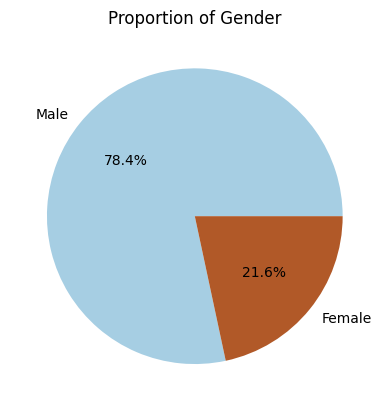

In [51]:
df_gender_plot.plot(kind='pie',
                    y='count',
                    autopct='%1.1f%%',
                    colormap='Paired',
                    labels=['Male', 'Female',],
                    ylabel='',
                    )
plt.title("Proportion of Gender", loc='center')
plt.show()

In [52]:
df_gender_time = df_wnan_timestamp[['trial_defendant_gender', 'trial_year']][df_wnan_timestamp.trial_year != np.nan]
df_gender_time = df_gender_time.explode('trial_defendant_gender')
df_gender_time = df_gender_time[~df_gender_time.isin(['indeterminate'])]
df_gender_time_plot = df_gender_time[['trial_defendant_gender', 'trial_year']].value_counts()
df_gender_time_plot

trial_defendant_gender  trial_year
male                    1843          2963
                        1842          2898
                        1848          2613
                        1847          2578
                        1841          2562
                                      ... 
                        1703            42
female                  1703            35
male                    1677            18
female                  1677             9
male                    1706             1
Name: count, Length: 469, dtype: int64

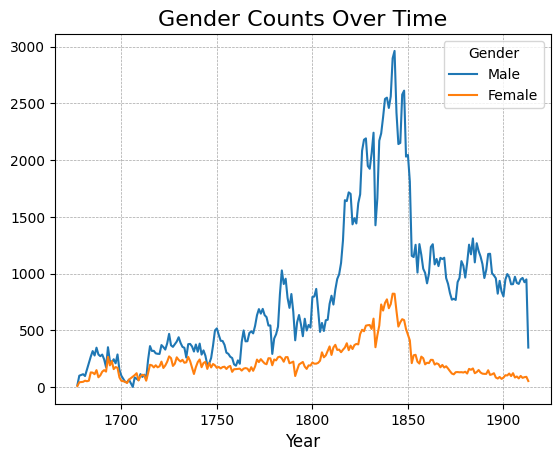

In [53]:
df_gender_time_plot['male'].sort_index().plot(
                    kind='line',
                    label='Male',)

df_gender_time_plot['female'].sort_index().plot(
                    kind='line',
                    label='Female')
plt.legend(title='Gender')

plt.title('Gender Counts Over Time', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.show()

In [54]:
df_gender_offense = df_wnan_timestamp[['trial_defendant_gender', 'trial_offence_category', 'trial_year']][(df_wnan_timestamp.trial_year != np) & df_wnan_timestamp.trial_defendant_gender.notna()]
df_gender_offense

,trial_defendant_gender,trial_offence_category,trial_year
229,[male],[kill],1677
230,[male],[theft],1677
231,"[male, male]","[theft, violentTheft, violentTheft, violentTheft]",1677
232,[male],[royalOffences],1677
233,[male],[royalOffences],1677
...,...,...,...
197746,[male],[breakingPeace],1913
197747,[male],[sexual],1913
197748,"[male, male]",[kill],1913
197749,[male],[sexual],1913


In [55]:
df_gender_offense[(df_gender_offense['trial_offence_category'].str.len() != df_gender_offense['trial_defendant_gender'].str.len())]
df_gender_offense = df_gender_offense.explode('trial_offence_category')
df_gender_offense = df_gender_offense.explode('trial_defendant_gender')
df_gender_offense = df_gender_offense[~df_gender_offense.isin(['indeterminate'])]
df_gender_offense

,trial_defendant_gender,trial_offence_category,trial_year
229,male,kill,1677
230,male,theft,1677
231,male,theft,1677
231,male,theft,1677
231,male,violentTheft,1677
...,...,...,...
197747,male,sexual,1913
197748,male,kill,1913
197748,male,kill,1913
197749,male,sexual,1913


In [56]:
df_gender_offense_plot = df_gender_offense[['trial_defendant_gender', 'trial_offence_category']].value_counts()
df_gender_offense_plot

trial_defendant_gender  trial_offence_category
male                    theft                     146575
female                  theft                      46311
male                    deception                  18117
                        violentTheft               12046
                        royalOffences              10598
                        breakingPeace               8312
                        sexual                      7519
                        kill                        4997
female                  royalOffences               3945
male                    miscellaneous               3434
female                  violentTheft                1747
                        deception                   1732
                        kill                        1478
                        miscellaneous               1307
                        breakingPeace               1180
male                    damage                      1073
female                  sexual           

In [66]:
# Reindexing to set only one index (trial_defendant_gender)
df_gender_offense_plot = df_gender_offense_plot.unstack(level=0)
df_gender_offense_plot

trial_defendant_gender,female,male
trial_offence_category,,
breakingPeace,1180,8312
damage,217,1073
deception,1732,18117
kill,1478,4997
miscellaneous,1307,3434
royalOffences,3945,10598
sexual,620,7519
theft,46311,146575
violentTheft,1747,12046


In [106]:
male_gender_offense_plot = df_gender_offense_plot['male']
male_gender_offense_plot

trial_offence_category
breakingPeace      8312
damage             1073
deception         18117
kill               4997
miscellaneous      3434
royalOffences     10598
sexual             7519
theft            146575
violentTheft      12046
Name: male, dtype: int64

In [107]:
female_gender_offense_plot = df_gender_offense_plot['female']
female_gender_offense_plot

trial_offence_category
breakingPeace     1180
damage             217
deception         1732
kill              1478
miscellaneous     1307
royalOffences     3945
sexual             620
theft            46311
violentTheft      1747
Name: female, dtype: int64

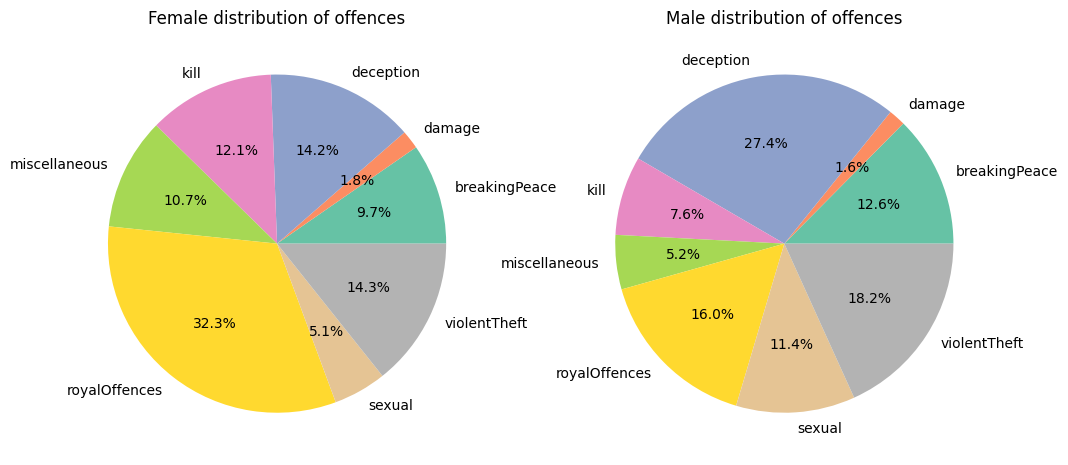

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

female_gender_offense_plot[female_gender_offense_plot.index != 'theft'].plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Set2',
                      ylabel='',
                      startangle=0,
                      ax=axes[0]
                      )

male_gender_offense_plot[male_gender_offense_plot.index != 'theft'].plot(kind='pie',
                                                                        autopct='%1.1f%%',
                                                                        colormap='Set2',
                                                                        ylabel='',
                                                                        startangle=0,
                                                                        ax=axes[1]
                                                                         )

axes[0].set_title('Female distribution of offences')
axes[1].set_title('Male distribution of offences')
plt.show()